In [1]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/titanic2/Titanic2.csv')
df_nedit = pd.read_csv('/kaggle/input/titanic2/Titanic2.csv')
df

/kaggle/input/titanicdataset-traincsv/train.csv
/kaggle/input/titanic2/Titanic2.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Анализ

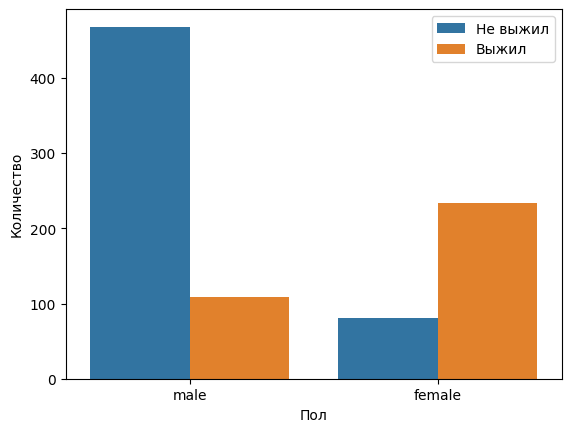

In [2]:
# Узнаем зависимость выживания от пола 
sns.countplot(data=df, x='Sex', hue='Survived')
plt.rcParams['figure.figsize'] = [12, 8]
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='', loc='upper right', labels=['Не выжил', 'Выжил'],)
plt.show()

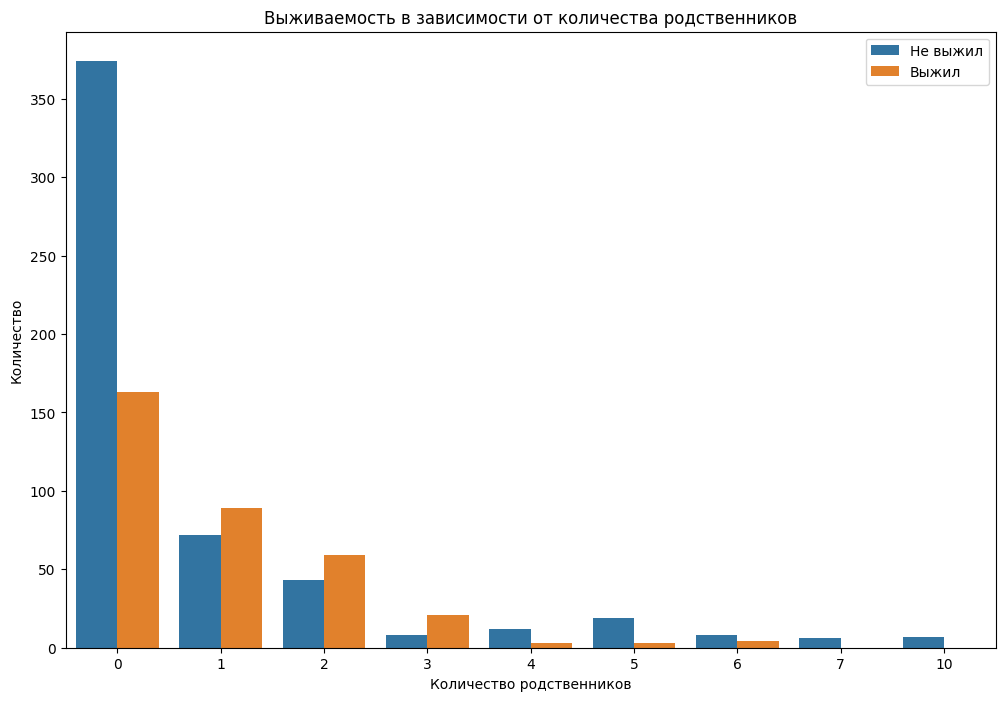

In [3]:
sns.countplot(data=df, x=df['Parch'] + df['SibSp'], hue='Survived')
plt.title('Выживаемость в зависимости от количества родственников')
plt.xlabel('Количество родственников')
plt.ylabel('Количество')
plt.legend(loc='upper right', labels=['Не выжил', 'Выжил'])
plt.show()

#### В процентом соотношении люди с 1-3 родственниками имеют больше шанс выжить, чем люди больше 4 родственниками.
#### Также стоит отметить среднюю(чуть меньше 50%) выживаемость одиноких людей

In [4]:
# следуя с  графика выше добавим в датасет два новых признака: Alone и FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch']
df['Alone'] = (df['FamilySize'] == 0)

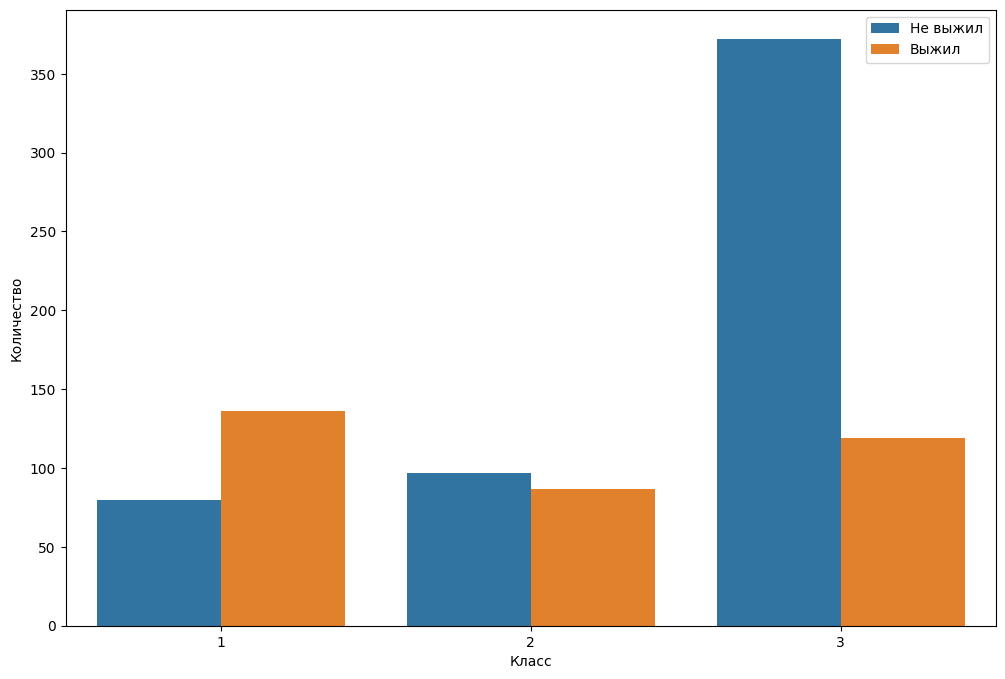

In [5]:
# Узнаем зависимость выживания от класса каюты
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.legend(title='', loc='upper right', labels=['Не выжил', 'Выжил'],)
plt.show()

### Люди с первого класса и второго класса имеют наибольшую выживаемость(в процентах)

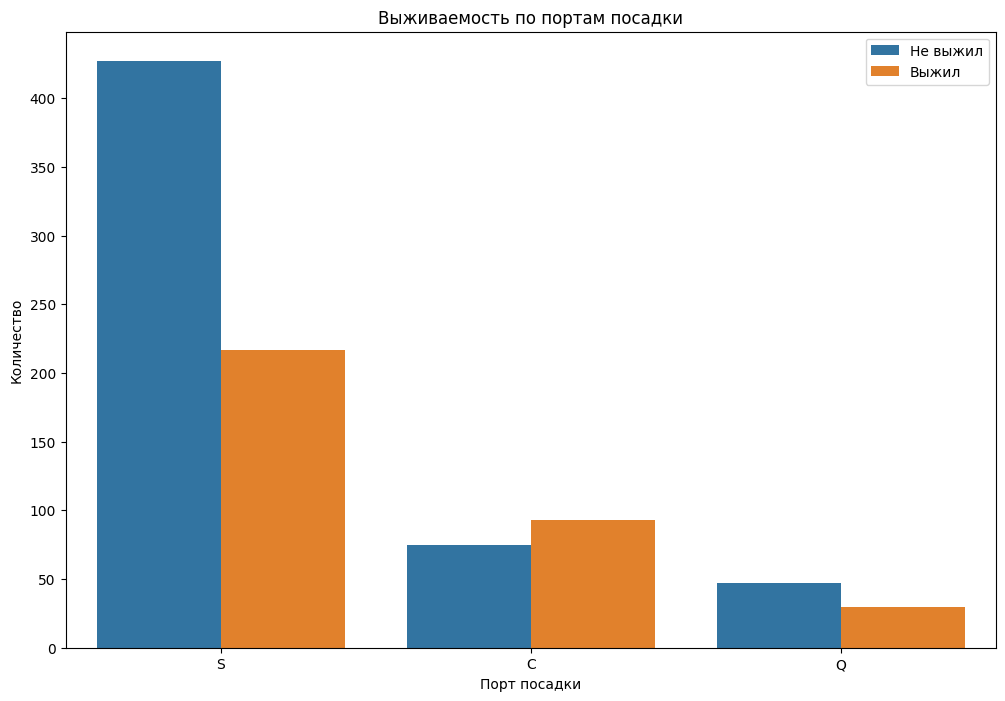

In [6]:
# Выживаемость по портам посадки на титаник
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Выживаемость по портам посадки')
plt.xlabel('Порт посадки')
plt.ylabel('Количество')
plt.legend(loc='upper right', labels=['Не выжил', 'Выжил'])
plt.show()

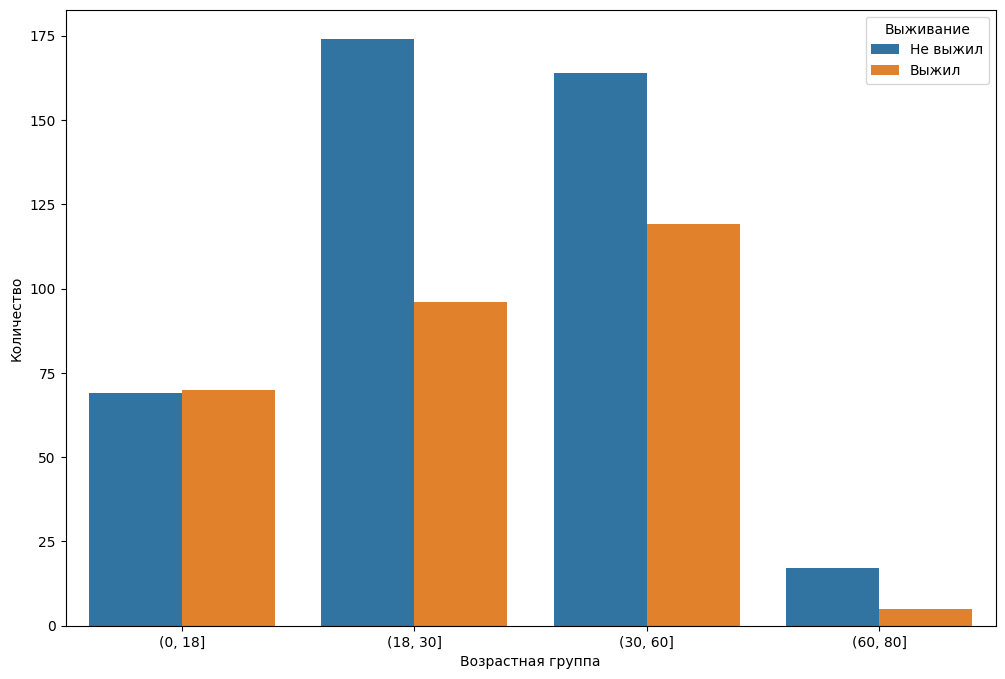

In [7]:
# Узнаем выживаемость в зависимости от возраста
# Для удобства разобью по возрастным группам
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30,60,80])
sns.countplot(data=df, x='AgeGroup', hue='Survived')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')
plt.legend(title='Выживание', loc='upper right', labels=['Не выжил', 'Выжил'])
plt.show()
df['AgeGroup'] = pd.Categorical(df['AgeGroup']).codes

### Видно высокую выживаемость у детей и у пожилых людей

14.4542


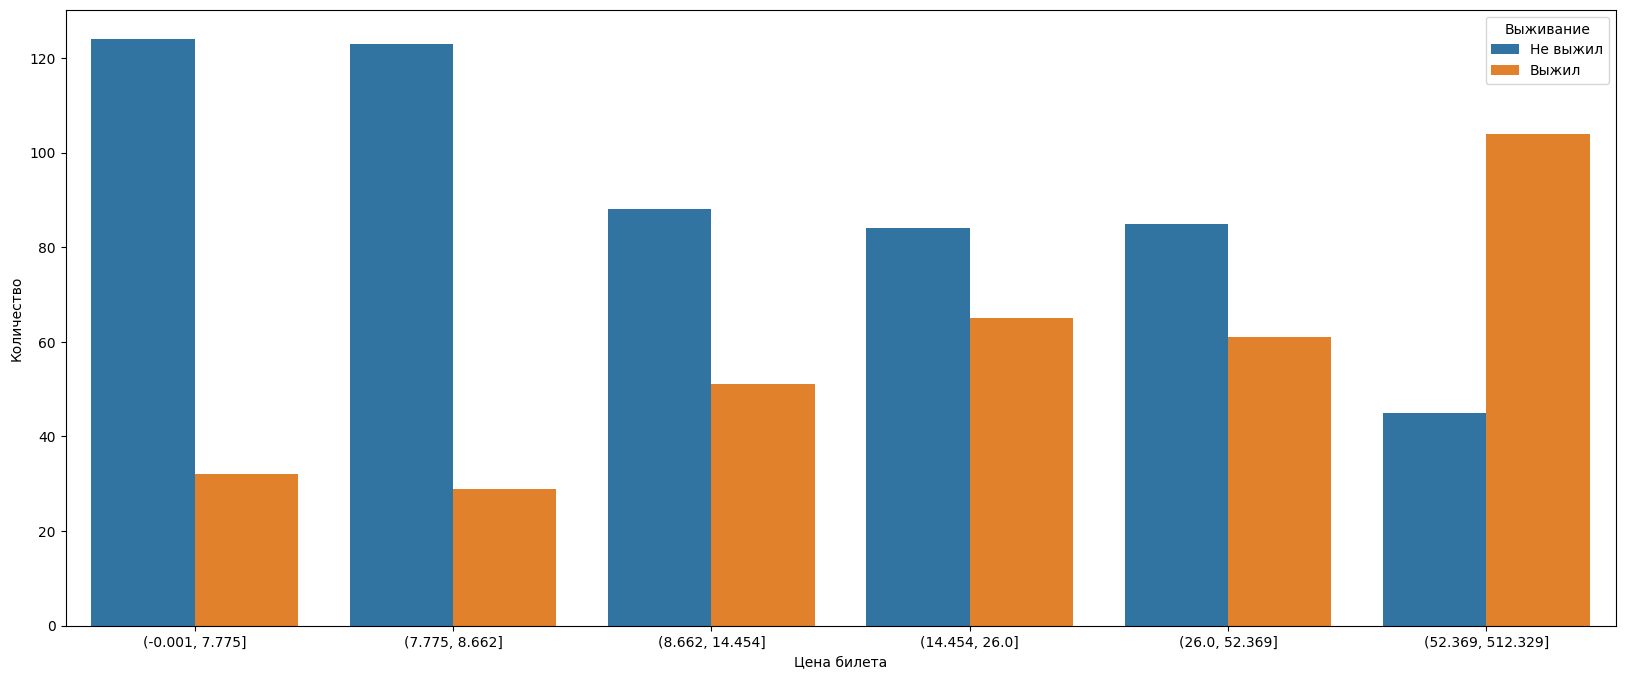

In [8]:
# Зависимость выживания от цены билета
# для удобства опять разобью цену на группы
plt.rcParams['figure.figsize'] = [20, 8]
print(df['Fare'].median())
df['FareGroup'] = pd.qcut(df['Fare'],6)
sns.countplot(data=df, x='FareGroup', hue='Survived')
plt.xlabel('Цена билета')
plt.ylabel('Количество')
plt.legend(title='Выживание', loc='upper right', labels=['Не выжил', 'Выжил'])
plt.show()
df['FareGroup'] = pd.Categorical(df['FareGroup']).codes

### Можно сказать что с повышением цены, на билет увеличивается выживание человека

In [9]:
df['Name']
# в столбце Name можно выделить фамилию каждого человека, и его титул.
# Предположу что в зависимости от фамилии человека, его выживаемость может расти(т.к уже выяснено что в зависимости от родственников его выживаемость может расти)
# Предположу что в зависимости от титула, его выживаемость может расти(т.к титулы зависят от пола человека, а в таблице выше видно большую разницу выживаемости по полу)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [10]:
# создадим строку с фамилиями
df["Surname"] = df["Name"].str.split(",").str.get(0)
# получим кол-во уникальных значений фамилий
df['Surname'] = pd.Categorical(df['Surname']).codes
print(df['Surname'].value_counts())
# решил отбросить эту идею, т.к понял что у не связанных с собой людей могут быть одинаковые фамилии
df.drop('Surname',axis=1,inplace=True)

Surname
16     9
532    7
464    6
563    6
100    6
      ..
234    1
343    1
399    1
228    1
159    1
Name: count, Length: 667, dtype: int64


Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


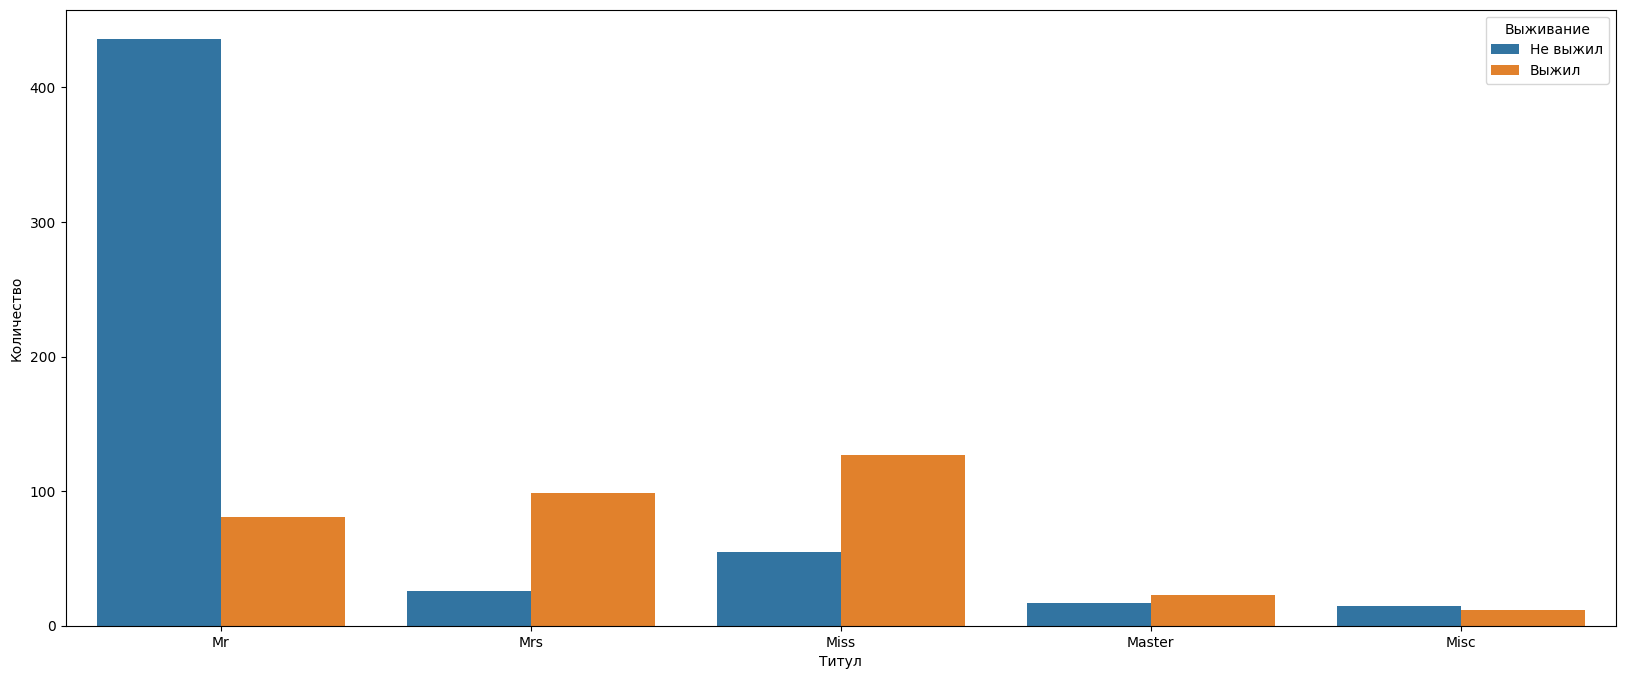

In [11]:
# Создадим столбец с титулами
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
print(df['Title'].value_counts())
df['Title'] = df['Title'].apply(lambda x: 'Misc' if (df['Title'].value_counts() < 40).loc[x] == True else x) # решаю оставить только 4 самых популярных титула, остальные обьединить в один

sns.countplot(data=df, x='Title', hue='Survived')
plt.xlabel('Титул')
plt.ylabel('Количество')
plt.legend(title='Выживание', loc='upper right', labels=['Не выжил', 'Выжил'])
plt.show()
df.drop('Name',axis=1,inplace=True) # больше не нужна эта строка

### Видно что наличие женского титула сильно решает в выживаемости

In [12]:
# получаем такой датасет
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,AgeGroup,FareGroup,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,1,0,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,2,5,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,1,1,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1,False,2,5,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,True,2,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,0,True,1,2,Misc
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,0,True,1,4,Miss
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,False,-1,3,Miss
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0,True,1,4,Mr


# Подготовка данных к модели

In [13]:
df.drop('PassengerId',axis=1,inplace=True)

In [14]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
FamilySize      0
Alone           0
AgeGroup        0
FareGroup       0
Title           0
dtype: int64

In [15]:
# заполню Embarked самым популярным значением
print(df['Embarked'].value_counts())
df['Embarked'] = df['Embarked'].fillna('S')
df.isnull().sum()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        0
FamilySize      0
Alone           0
AgeGroup        0
FareGroup       0
Title           0
dtype: int64

In [16]:
# заполню возраст
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        0
FamilySize      0
Alone           0
AgeGroup        0
FareGroup       0
Title           0
dtype: int64

In [17]:
# откину Cabin т.к большая часть значений == NaN
df.drop('Cabin',axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_columns = df.select_dtypes(include=['object','bool','float']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
        
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Alone,AgeGroup,FareGroup,Title
0,0,3,1,28,1,0,523,18,2,1,0,1,0,3
1,1,1,0,52,1,0,596,207,0,1,0,2,5,4
2,1,3,0,34,0,0,669,41,2,0,1,1,1,2
3,1,1,0,48,1,0,49,189,2,1,0,2,5,4
4,0,3,1,48,0,0,472,43,2,0,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,35,0,0,101,85,2,0,1,1,2,1
887,1,1,0,24,0,0,14,153,2,0,1,1,4,2
888,0,3,0,39,1,2,675,131,2,3,0,-1,3,2
889,1,1,1,34,0,0,8,153,0,0,1,1,4,3


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_columns = df_nedit.select_dtypes(include=['object','bool','float']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df_nedit[column] = le.fit_transform(df_nedit[column])
    label_encoders[column] = le
        
df_nedit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,28,1,0,523,18,147,2
1,2,1,1,190,0,51,1,0,596,207,81,0
2,3,1,3,353,0,34,0,0,669,41,147,2
3,4,1,1,272,0,47,1,0,49,189,55,2
4,5,0,3,15,1,47,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,35,0,0,101,85,147,2
887,888,1,1,303,0,24,0,0,14,153,30,2
888,889,0,3,413,0,88,1,2,675,131,147,2
889,890,1,1,81,1,34,0,0,8,153,60,0


# Первая модель

### Sequential с подготовленной df

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8354 - loss: 0.3896 
Test Accuracy: 0.81
Test Loss: 0.41


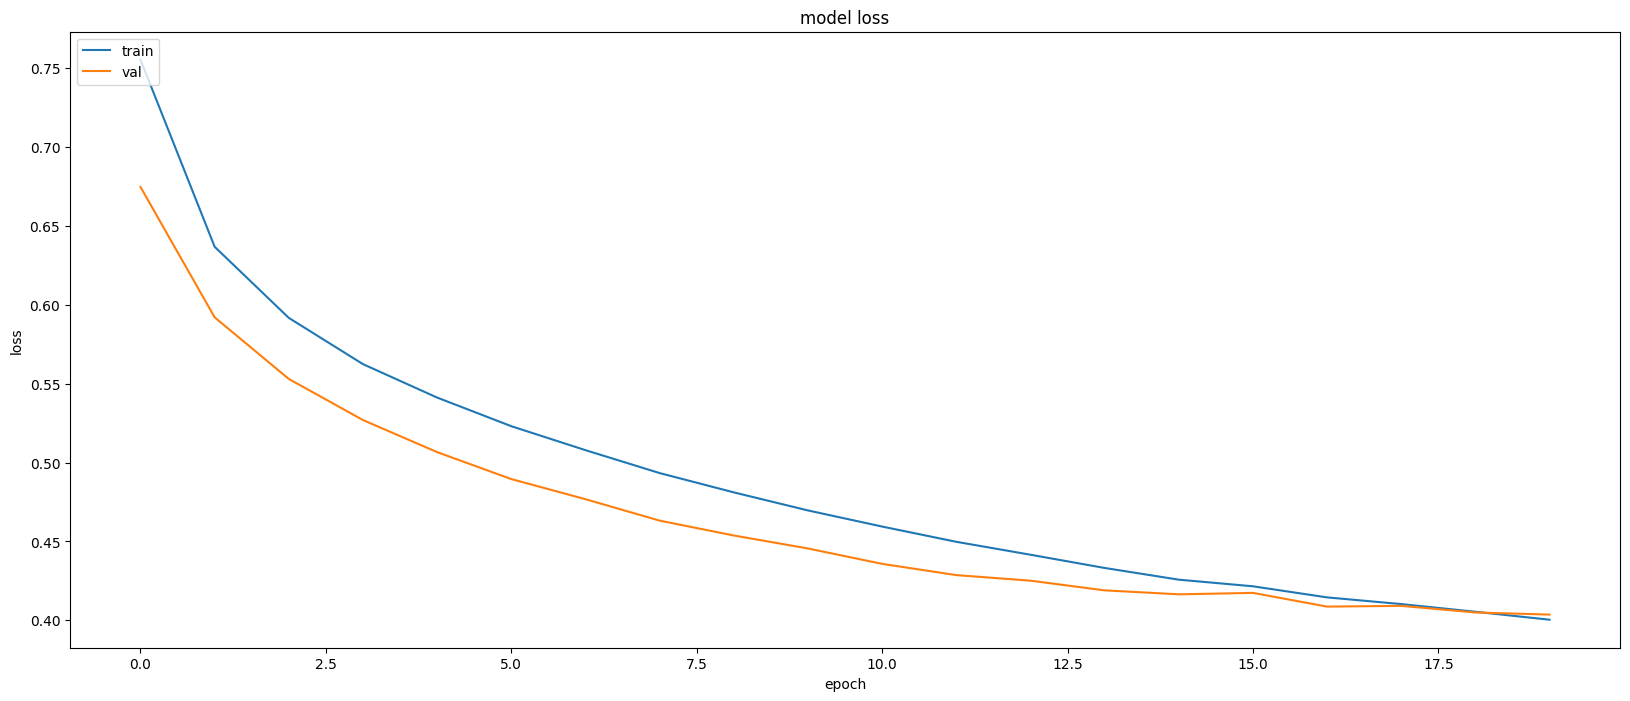

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


X = df.drop(columns=['Survived'])
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2,verbose=0)
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Sequential с базовой df

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8157 - loss: 0.4077 
Test Accuracy: 0.82
Test Loss: 0.43


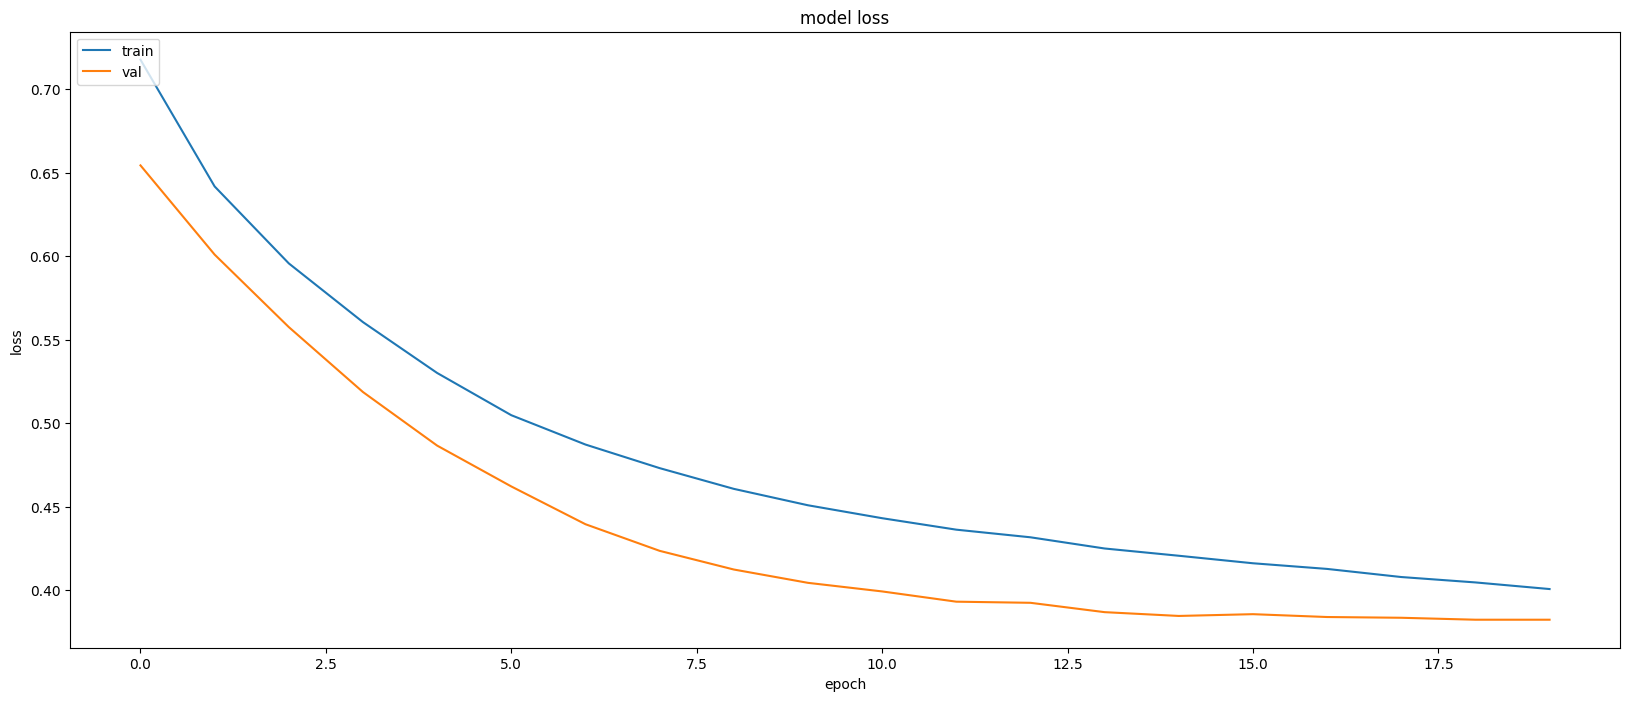

In [21]:
X = df_nedit.drop(columns=['Survived'])
y = df_nedit['Survived']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2,verbose=0)
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


### Видно что проведенный feature enginerring оказал минимальное влияние на loss и никак не увеличил accuracy

### Узнаю feature_importances

### GBC С PARCH и ALONE

Accuracy: 0.8324022346368715


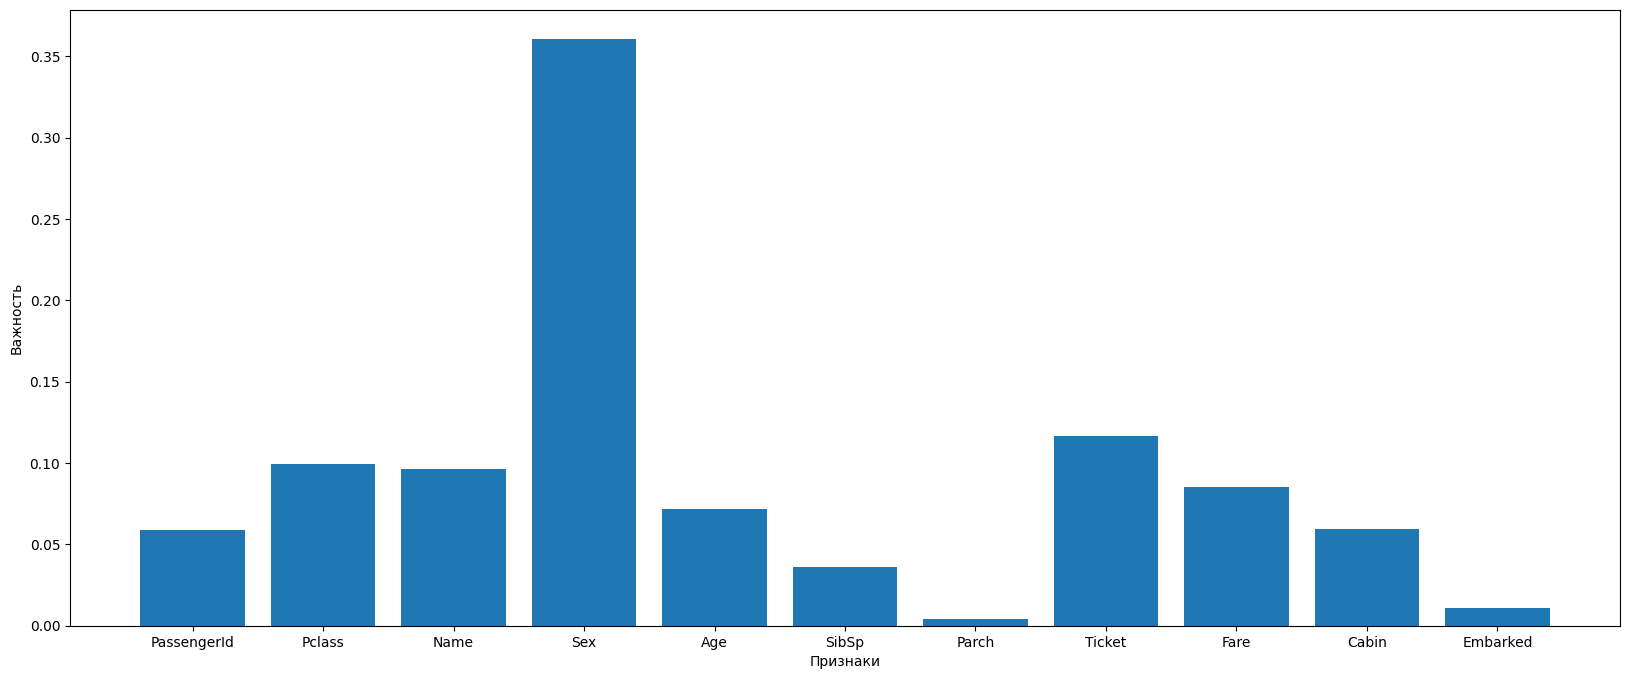

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

GBC = GradientBoostingClassifier(n_estimators=200)
GBC.fit(X_train, y_train)

predictions = GBC.predict(X_test)

acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

feature_importances = GBC.feature_importances_

feat_names = list(X.columns)
plt.bar(feat_names, feature_importances)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

In [23]:
# видно что признаки Parch и Alone неэффективны

In [24]:
# удаляю слабые признаки и запускаю модель
ndf = df.copy()
ndf.drop(['Parch','Alone'],axis=1,inplace=True)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.4068 
Test Accuracy: 0.80
Test Loss: 0.42


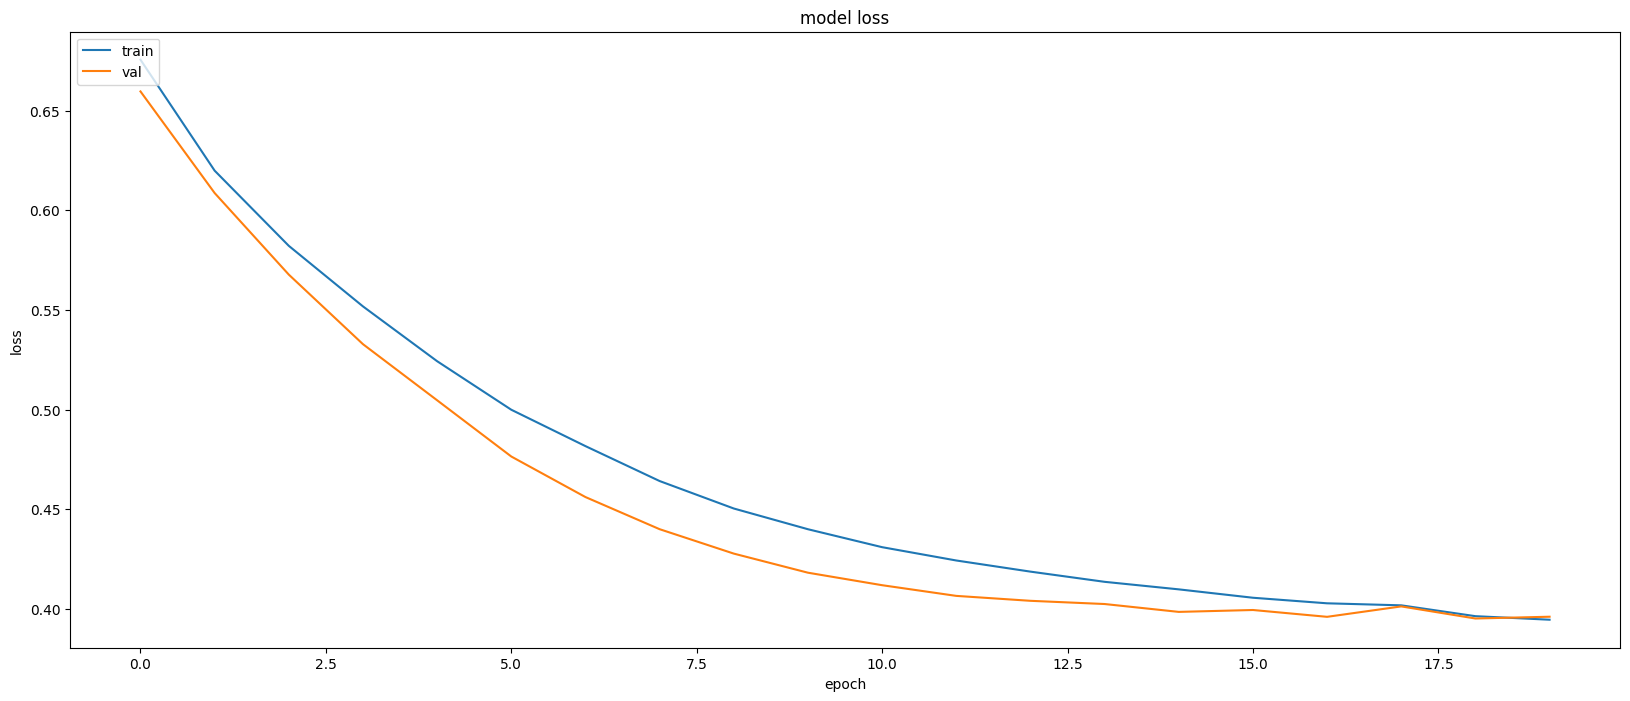

In [25]:
X = ndf.drop(columns=['Survived'])
y = ndf['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2,verbose=0)
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {accuracy:.2f}')
print(f'Test Loss: {loss:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Попробую другие модели

### GBC без PARCH И ALONE

Точность на тестовой выборке 0.7988826632499695
Точность по кроссвалидации: [0.82222222 0.83146067 0.75280899 0.88764045 0.87640449 0.88764045
 0.85393258 0.79775281 0.92134831 0.87640449]
Среднее значение по кроссвалидации: 0.8507615480649189


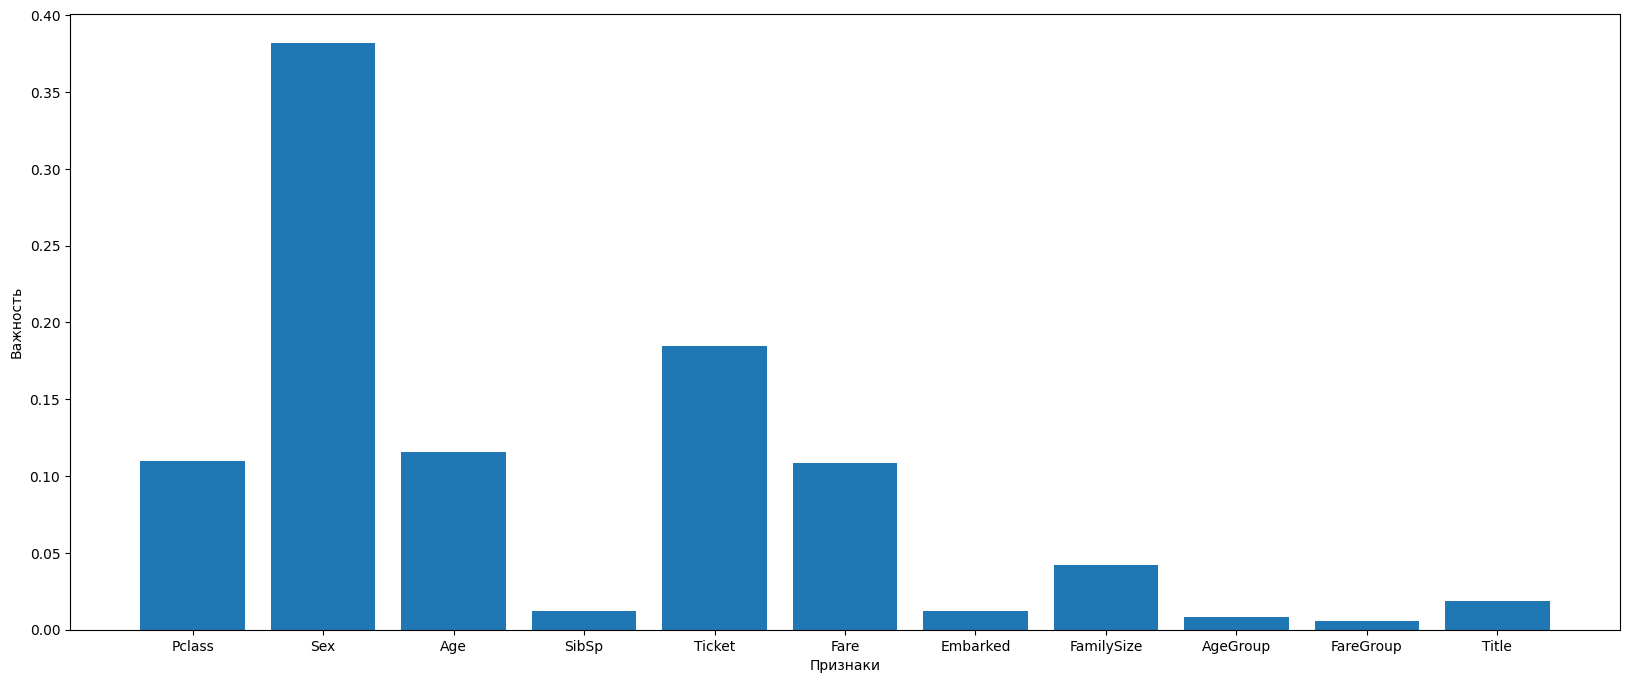

In [26]:
X = ndf.drop(columns=['Survived'])
y = ndf['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
GBC = GradientBoostingClassifier(n_estimators=200)

GBC.fit(X_train,y_train)

predict = GBC.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Точность на тестовой выборке',accuracy)

# добавлю кроссвалидацию
cv_scores = cross_val_score(GBC, X, y, cv=10)
print('Точность по кроссвалидации:', cv_scores)
print('Среднее значение по кроссвалидации:', cv_scores.mean())

feature_importances = GBC.feature_importances_
feat_names = list(X.columns)
plt.bar(feat_names, feature_importances)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

##  Проверю какие значения показывает RandomForestClassifier

### RFC С PARCH И ALONE

Точность на тестовой выборке 0.7988826632499695
Точность по кроссвалидации: [0.82222222 0.87640449 0.76404494 0.85393258 0.86516854 0.86516854
 0.84269663 0.75280899 0.87640449 0.82022472]
Среднее значение по кроссвалидации: 0.8339076154806492


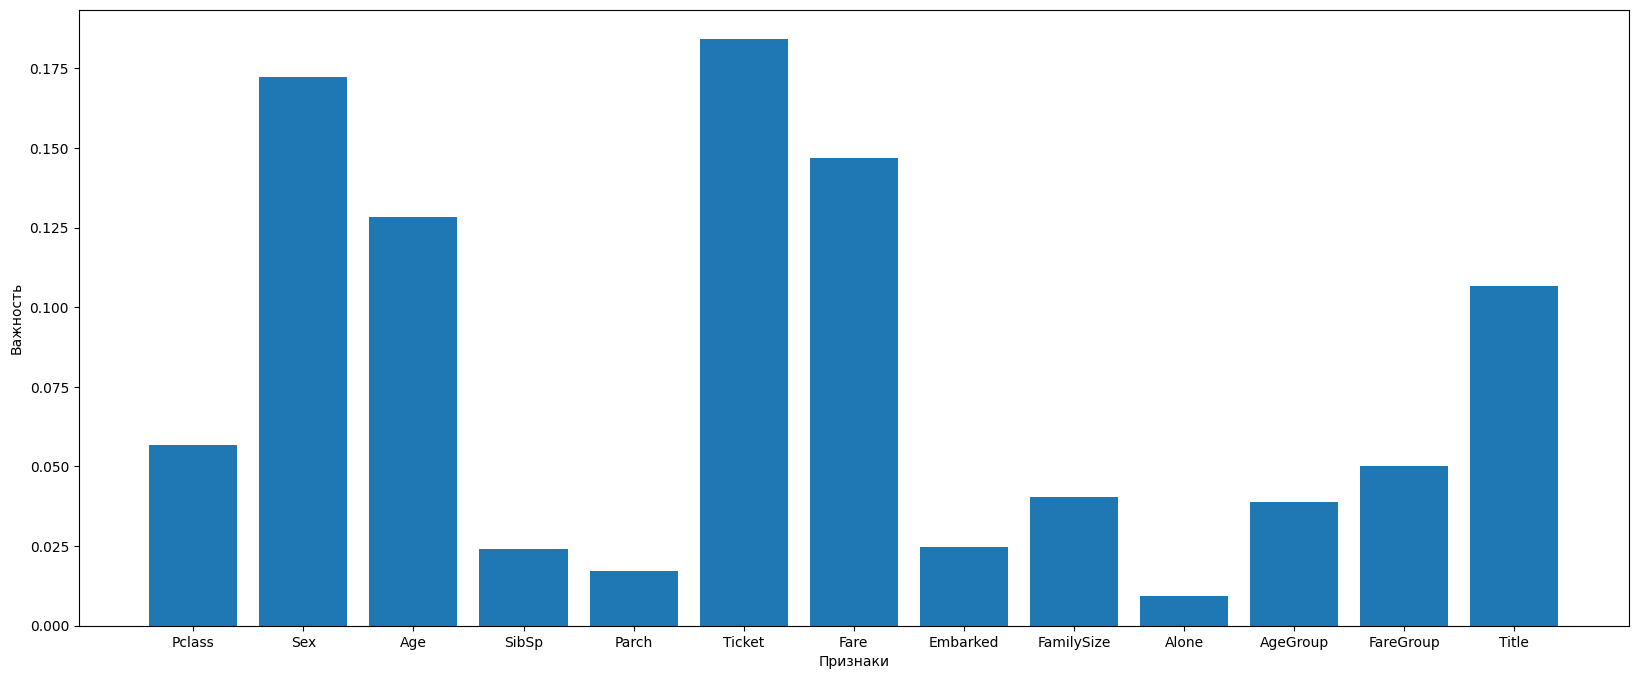

In [27]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train,y_train)

predict = rf.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Точность на тестовой выборке',accuracy)

cv_scores = cross_val_score(rf, X, y, cv=10)
print('Точность по кроссвалидации:', cv_scores)
print('Среднее значение по кроссвалидации:', cv_scores.mean())

feature_importances = rf.feature_importances_
feat_names = list(X.columns)
plt.bar(feat_names, feature_importances)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

### RFC без PARCH И ALONE

Точность на тестовой выборке 0.7988826632499695
Точность по кроссвалидации: [0.78888889 0.88764045 0.7752809  0.86516854 0.87640449 0.85393258
 0.84269663 0.76404494 0.8988764  0.79775281]
Среднее значение по кроссвалидации: 0.8350686641697876


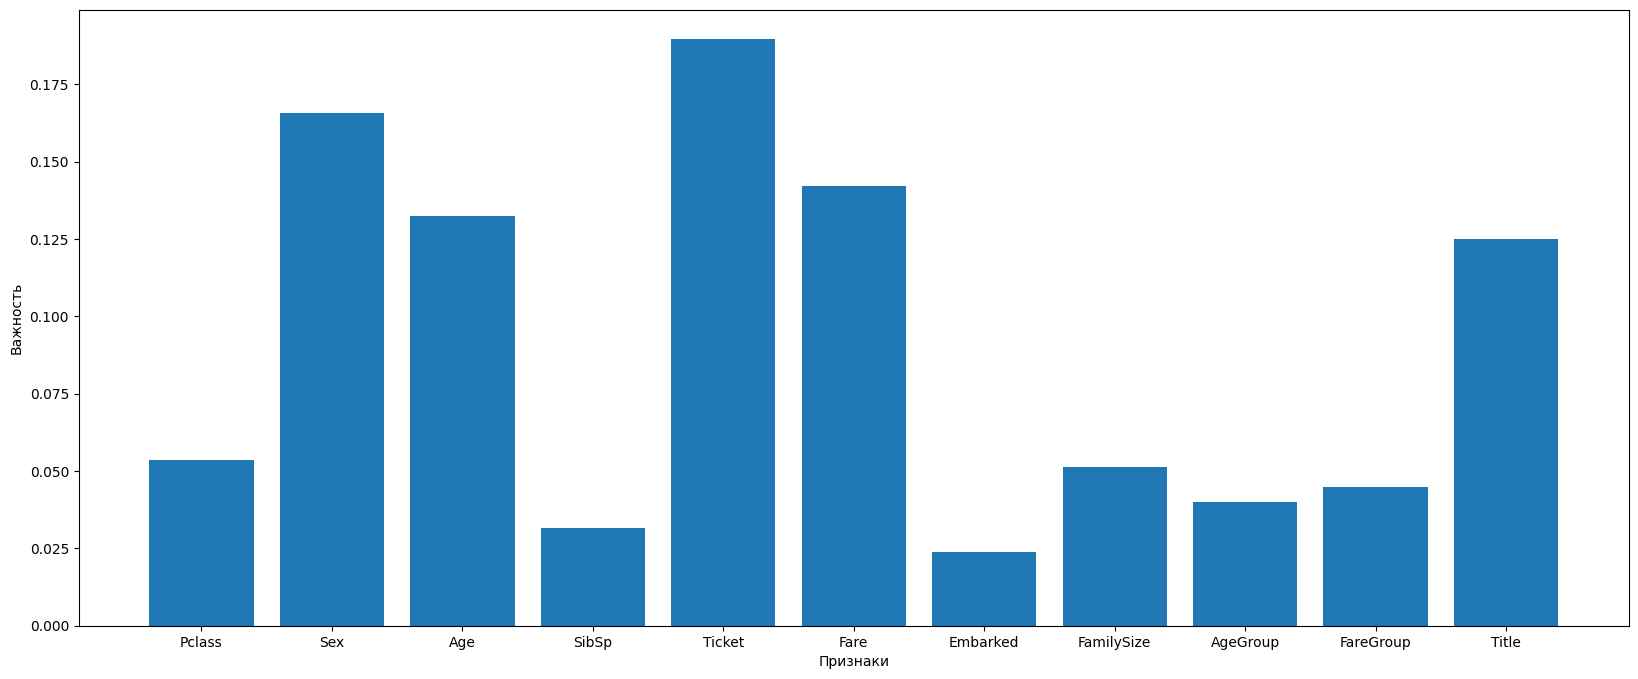

In [28]:
from sklearn.ensemble import RandomForestClassifier
X = ndf.drop(columns=['Survived'])
y = ndf['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train,y_train)

predict = rf.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('Точность на тестовой выборке',accuracy)

cv_scores = cross_val_score(rf, X, y, cv=10)
print('Точность по кроссвалидации:', cv_scores)
print('Среднее значение по кроссвалидации:', cv_scores.mean())

feature_importances = rf.feature_importances_
feat_names = list(X.columns)
plt.bar(feat_names, feature_importances)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

### Лучше всего себя показал GBC, дальше построю итоговую модель используя его

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=150)

# кросс-валидация с 3 фолдами
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_train):
    X_kf_train, X_kf_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_kf_train, y_kf_test = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_kf_train, y_kf_train) 
    y_kf_pred = model.predict(X_kf_test)  

    # создание отчета об классификации
    classification_report(y_kf_test, y_kf_pred)

    # создание матрицы ошибок
    cm = confusion_matrix(y_kf_test, y_kf_pred)
    

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Итоговый отчет о классификации:")
print(classification_report(y_test, y_pred))

cm_final = confusion_matrix(y_test, y_pred)
print("Итоговая Confusion Matrix:")
print(cm_final)

tp = cm_final[1, 1]  # True Positives
tn = cm_final[0, 0]  # True Negatives
fp = cm_final[0, 1]  # False Positives
fn = cm_final[1, 0]  # False Negatives

# Расчет точности
P = tp + fn # число истинных результатов,
N = tn + fp # число ложных результатов, 
accuracy = (tp + tn) / (P + N)
print(f"Общая точность модели: {accuracy}")

Итоговый отчет о классификации:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

Итоговая Confusion Matrix:
[[92 13]
 [16 58]]
Общая точность модели: 0.8379888268156425


## Анализ отчета классификации

(Precision) Отношение истинно положительных результатов к сумме истинных и ложных срабатываний.
* 0: 0.84 (84% объектов, отнесенных к классу 0, действительно принадлежат к нему).
* 1: 0.80 (80% объектов, отнесенных к классу 1, действительно принадлежат к нему).

(Recall) Отношение истинных положительных результатов к сумме истинно положительных и ложно отрицательных результатов
* 0: 0.87 (87% объектов класса 0 были правильно классифицированы).
* 1: 0.77 (77% объектов класса 1 были правильно классифицированы).

(F1-Score) Cреднее значение(баланс между) precision и recall
* 0: 0.85
* 1: 0.79

(Support) Количество фактических вхождений класса в набор данных. 
* 179

## Анализ матрицы ошибок

Модель показала, что погибнет, а по факту не погибло: 17 человек.

Модель показала, что не погибнет, а по факту погибло: 14 человек.

Модель показала, что погибнет, а по факту погибло: 57 человек.

Модель показала, что не погибнет, а по факту не погибло: 91 человек.

# В общем, модель демонстрирует хорошую точность и полноту по классу 0, что должно говорить о хорошом качестве классификации. Однако, мне не удалось поднять accuracy выше той, что была с моделью Sequential